In [479]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
import csv
import time

In [480]:
all_data = []

In [481]:
'''#read in house price dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/house_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row])
        
with open("DataSets/house_price.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(float(row[0]))

        
print(len(X_training))
print(len(y_training))
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])
print(X_training)
print(y_training)'''

'#read in house price dataset\nX_training = []\ny_training = []\nheader = []\nc = 0\nwith open("DataSets/house_att.csv","r") as file:\n    r = csv.reader(file)\n    for row in r:\n        if(c == 0):\n            header = row\n            c+=1\n            continue\n        X_training.append([float(x) for x in row])\n        \nwith open("DataSets/house_price.csv","r") as file:\n    r = csv.reader(file)\n    for row in r:\n        y_training.append(float(row[0]))\n\n        \nprint(len(X_training))\nprint(len(y_training))\nX_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data\nall_data.append([X_train, X_test, y_train, y_test,header])\nprint(X_training)\nprint(y_training)'

In [482]:
#read in irirs dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/iris.csv","r") as file:
    r = csv.reader(file)
    counter = 0
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
      
        print(row)
        X_training.append([float(x) for x in row[:-1]])
        y_training.append(row[-1])

for i in range(len(X_training)):
    if(y_training[i] == "Setosa"):
        y_training[i] = 1
    if(y_training[i] == "Versicolor"):
        y_training[i] = 2
    if(y_training[i] == "Virginica"):
        y_training[i] = 3
        
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

['5.1', '3.5', '1.4', '.2', 'Setosa']
['4.9', '3', '1.4', '.2', 'Setosa']
['4.7', '3.2', '1.3', '.2', 'Setosa']
['4.6', '3.1', '1.5', '.2', 'Setosa']
['5', '3.6', '1.4', '.2', 'Setosa']
['5.4', '3.9', '1.7', '.4', 'Setosa']
['4.6', '3.4', '1.4', '.3', 'Setosa']
['5', '3.4', '1.5', '.2', 'Setosa']
['4.4', '2.9', '1.4', '.2', 'Setosa']
['4.9', '3.1', '1.5', '.1', 'Setosa']
['5.4', '3.7', '1.5', '.2', 'Setosa']
['4.8', '3.4', '1.6', '.2', 'Setosa']
['4.8', '3', '1.4', '.1', 'Setosa']
['4.3', '3', '1.1', '.1', 'Setosa']
['5.8', '4', '1.2', '.2', 'Setosa']
['5.7', '4.4', '1.5', '.4', 'Setosa']
['5.4', '3.9', '1.3', '.4', 'Setosa']
['5.1', '3.5', '1.4', '.3', 'Setosa']
['5.7', '3.8', '1.7', '.3', 'Setosa']
['5.1', '3.8', '1.5', '.3', 'Setosa']
['5.4', '3.4', '1.7', '.2', 'Setosa']
['5.1', '3.7', '1.5', '.4', 'Setosa']
['4.6', '3.6', '1', '.2', 'Setosa']
['5.1', '3.3', '1.7', '.5', 'Setosa']
['4.8', '3.4', '1.9', '.2', 'Setosa']
['5', '3', '1.6', '.2', 'Setosa']
['5', '3.4', '1.6', '.4', 'Set

In [483]:
#Sort dataset by an attribute.(increasing order)
def sort_f(X,y,column):
    

  
    sortf = zip(X,y)
    sortf= sorted(sortf,key = lambda x:x[0][column])
    X = [x for x,y in sortf]
    y = [y for x,y in sortf]
    
    

    return X,y

In [484]:
#Sort dataset by an attribute.(increasing order)
def sort_f2(X,y):
    

  
    sortf = zip(X,y)
    sortf= sorted(sortf,key = lambda x:x[1])
    X = [x for x,y in sortf]
    y = [y for x,y in sortf]
    
    

    return X,y

In [485]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.nodes = []
        self.leaf = 0
        self.std = 0
        

In [486]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        self.steps = []
        self.variance = []
        self.std = []
        
        self.leaf = 0 #true or false

In [487]:
def get_features(X,labels,column,bottom,top):
    
    #Return a portion of the dataset, which's attributes is in a certain


    sub_label = [labels[x] for x in range(len(labels)) if X[x][column]<top and X[x][column]>=bottom]
    sub_X = [X[x] for x in range(len(X)) if X[x][column]<top and X[x][column]>=bottom]

        
    return [sub_X,sub_label]

In [488]:
def calculate_std(data):
    
    #print(data)
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        variance += (i-mean)**2
    
    
    return math.sqrt(variance/len(data))
    

In [489]:
def find_min_distance(sliced_data,column):
    
    dist = 0
    min_dist = -1
    index1 = -1
    index2 = -1
    
    #determine what to merge by the standard deviation
    
    for i in range(len(sliced_data)-1):

            std_local = 0
            X = sliced_data[i][0]
            X2 = sliced_data[i+1][0]
            X = [ X[j][column] for j in range(len(X)) ] 
            X2 = [ X2[j][column] for j in range(len(X2)) ]
            
                

            dist = abs(calculate_std(sliced_data[i][1])-calculate_std(sliced_data[i+1][1]))
            #dist = abs(calculate_std(X)-calculate_std(X2))??????
            
            if(min_dist == -1):
                min_dist = dist
                index1 = i
                index2 = i+1
            if(dist<min_dist):
                min_dist = dist
                index1 = i
                index2 = i+1
    
    return index1,index2
    

In [490]:
def merge(sliced_data,column):
    
   

    index1,index2 = find_min_distance(sliced_data,column)
    

    sliced_data[index1][0] = sliced_data[index1][0]+sliced_data[index2][0]
    sliced_data[index1][1] = sliced_data[index1][1]+sliced_data[index2][1]

   
    
    sliced_data.pop(index2)

    return sliced_data

In [491]:
def pre_merge(sliced_data,index,std,column):
    
   

    #index1,index2 = find_min_distance(sliced_data,column)
    std_local = 0
    X = sliced_data[index][0]
    X2 = sliced_data[index+1][0]
    features = [ X[j][column] for j in range(len(X)) ] + [ X2[j][column] for j in range(len(X2)) ]
    std_local += calculate_std(features)


    if(std_local<= std ) :

        sliced_data[index][0] = sliced_data[index][0]+sliced_data[index+1][0]
        sliced_data[index][1] = sliced_data[index][1]+sliced_data[index+1][1]
        sliced_data.pop(index+1)
        return sliced_data
   
    return sliced_data

In [492]:
def calculate_std_avg(features):# átadni az x vectortSzoft
    std = 0

    for i in range(len(features)-1):
            std += calculate_std(features[i] + features[i+1])

    std = std/len(features)

    return std

In [493]:
def get_features2(sliced_data,column):

    features = []

    for i in sliced_data:
        features.append([ i[0][j][column] for j in range(len(i[0])) ])
    
    return features

In [494]:
def preprocess(X,labels,column):

    sliced_data = [[ [x] , [y] ] for x,y in zip(X,labels)]

    #features = []
    #for i in range(len(X[0])):
    #    features.append([ [X[j][i]] for j in range(len(X)) ] )

    features = [ [X[j][column]] for j in range(len(X)) ] 
    labels = [ [j] for j in labels ] 
    #std = calculate_d_avg(labels)
    std = calculate_std_avg(features)
    index = -1
    l = 0

    while(len(sliced_data)>=20):
        #print(len(sliced_data))
        #merg
        index += 1
        if(index>=len(sliced_data)-1):
            index = 0
            if(len(sliced_data) == l):
                break
            else:
                l = len(sliced_data)
            std = calculate_std_avg(get_features2(sliced_data,column))
            

        sliced_data = pre_merge(sliced_data,index,std,column)
        

    return sliced_data

In [495]:
def find_best_split(X,labels,feature_ids,steps,div):
    
    step = -1

    features = 0 
    svalue = 0
    
    min_error = -1
    min_sliced_data = []
    min_regressions = []
    min_steps = -1
    min_column = -1

    #X,labels = sort_f2(X,labels)
    #sliced_data = preprocess(X,labels,column)

    for column in feature_ids:
            #print('____________________________________________________________________________--')
            
            X,labels = sort_f(X,labels,column)   #feature based merge-nél kell        
            #sliced_data = []
            #X,labels = sort_f2(X,labels) 
            if(steps[column] > 11 ):
                    continue


            sliced_data = preprocess(X,labels,column)
            
            ''' print(sliced_data[x][1] for x in range(len(sliced_data)))
            for i in sliced_data:
                 print(i[1])'''

            print('///////////////////////////////////////////////')
            while(len(sliced_data)>div):

                sliced_data = merge(sliced_data,column)
                '''print(sliced_data[x][1] for x in range(len(sliced_data)))
                for i in sliced_data:
                    print(i[1])'''
                #print(len(sliced_data))
                
            
            error = 0
            for i in range(len(sliced_data)):
                
                error += calculate_std(sliced_data[i][1])
            #sum the error after the split
            #choose min
            #print(error)
            if(min_error == -1):
                min_sliced_data = sliced_data
                
                min_steps = step
                min_column = column
                min_error = error
                continue
            #choose the splited data with the minimum error
            if(error<min_error):
                min_sliced_data = sliced_data
                min_error = error
                min_steps = step
                min_column = column
    
    #return split,split_value
    steps[min_column] += 1
    '''if(min_steps < 2 and min_steps>=0):
            steps[min_column] += 1'''
    
    return min_sliced_data,min_column,steps


In [496]:
def build_tree(X,feature_ids,labels,leaf_size,limit,div,depth,steps,X_train,y_train):
    
    #find the best split for sub_nodes
    #return sub_nodes
    split = 0 
    sub_nodes = []
    
    st = steps.copy()
    
    #get the best split 
    split_data,column,st = find_best_split(X,labels,feature_ids,st,div)
    
    #create objects and inicialize them
    for i in split_data:
        
        node = Node(i[1],i[0],feature_ids)
        node.split = column 
        if(column == 5):  
            print(column)
            print([ node.X[j][column] for j in range(len(node.X)) ] )
        node.split_result = i[0][-1][column]
        node.depth = depth
        
        node.top =   max([x[column] for x in node.X ])
        node.bottom = min([x[column] for x in node.X ])
        node.steps = st

        node.std.append(calculate_std(node.labels))

        print(' ' * depth,node.top,node.bottom)
        if(len(node.labels) <= 10 or calculate_std(node.labels)<0.1):
            '''ArithmeticErrorif(len(node.labels) <= leaf_size):
                print('Size matters!')
            if(calculate_std(node.labels)<limit):
                print('Inside that matters')'''
            #print(calculate_std([ node.X[j][3] for j in range(len(node.X)) ]) )
            node.leaf = 1

            '''a = zip(X_train,y_train)
            b = zip(node.X,node.labels)
            
            for j in b:
                
                for k in a:
                    #print(k[0])
                    if j[0][0] == k[0][0] and j[0][1] == k[0][1] and j[0][2] == k[0][2] and j[0][3] == k[0][3] and j[1] == k[1]:
                        print(k)
                        print(j)
                        print('Hit')
                        break'''
            #for j in zip(node.X,node.labels):
            #    print(j)
            #print(depth)
            print('leaf')
            #print(node.X)
            print(node.labels)
            print(node.steps)
            print(node.top,'top')
            print(node.bottom,'bottom')
            print(node.split,'split')
            if(calculate_std(node.labels)>=100):
                #print("///////////////////////////")
                
                print(calculate_std([ node.X[j][0] for j in range(len(node.X)) ]))
                print(calculate_std([ node.X[j][1] for j in range(len(node.X)) ]))
                print(calculate_std([ node.X[j][2] for j in range(len(node.X)) ]))
                print(calculate_std([ node.X[j][3] for j in range(len(node.X)) ]))
                print(calculate_std(node.labels),len(node.labels))
            
        else:
            node.leaf = 0
            
        sub_nodes.append(node)
    
    if(depth == 2000):
        for i in sub_nodes:
            print('limit')
            i.leaf = 1
        return sub_nodes
    
    depth +=1
    #print(depth)
    leaf =  0
    for i in sub_nodes:
        if(i.leaf == 1):
            leaf +=1
            
    if(leaf == len(sub_nodes)):
        for i in sub_nodes:
            '''print("///////////////////////////")
            print(calculate_std([ i.X[j][0] for j in range(len(i.X)) ]))
            print(calculate_std([ i.X[j][1] for j in range(len(i.X)) ]))
            print(calculate_std([ i.X[j][2] for j in range(len(i.X)) ]))
            print(calculate_std([ i.X[j][3] for j in range(len(i.X)) ]))
            print(i.labels)'''
            '''print([ i.X[j][0] for j in range(len(i.X)) ])
            print([ i.X[j][1] for j in range(len(i.X)) ])
            print([ i.X[j][2] for j in range(len(i.X)) ])
            print([ i.X[j][3] for j in range(len(i.X)) ])
            print(i.labels)
            print(calculate_std(i.labels),len(i.labels))'''
            if(calculate_std(i.labels)>=100):
                #print("///////////////////////////")
                '''print(calculate_std([ i.X[j][0] for j in range(len(i.X)) ]))
                print(calculate_std([ i.X[j][1] for j in range(len(i.X)) ]))
                print(calculate_std([ i.X[j][2] for j in range(len(i.X)) ]))
                print(calculate_std([ i.X[j][3] for j in range(len(i.X)) ]))'''
                print(calculate_std(i.labels),len(i.labels))

            
        return sub_nodes
  
    else:
        for node in sub_nodes:

            if(node.leaf == 0):

                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,limit,div,depth,node.steps,X_train,y_train)


    return sub_nodes   

In [497]:
def inicialize(X,feature_names,labels,leaf_size,limit,div):
    
    depth = 1
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    
    steps = []
    for i in feature_ids:
        steps.append(0)
    #start building tree
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,limit,div,depth,steps,X,labels)
    return tree

In [498]:
forest = []
times = []
#limits = [0.5,0.75,1,1.25,1.5,1.75,2]
divide = [2,3,4,5]

#for each dataset we build a tree and mesure the elapsed time
for i in all_data:
    f = []
    t = []
    for j in divide:
       
        print("-------------------------------------------------------")

        start = time.time()
        tree = inicialize(i[0],i[-1],i[2],10,1,j)
        end = time.time()
        f.append(tree)
        print(end-start)
        t.append(end-start)
    forest.append(f)
    times.append(t)
    

-------------------------------------------------------
///////////////////////////////////////////////
///////////////////////////////////////////////
///////////////////////////////////////////////
///////////////////////////////////////////////
  1.8 0.1
  2.5 1.9
leaf
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 1]
2.5 top
1.9 bottom
3 split
///////////////////////////////////////////////
///////////////////////////////////////////////
///////////////////////////////////////////////
///////////////////////////////////////////////
   5.1 1.0
   6.3 5.5
leaf
[3, 3, 3, 3, 3, 3]
[0, 0, 1, 1]
6.3 top
5.5 bottom
2 split
///////////////////////////////////////////////
///////////////////////////////////////////////
///////////////////////////////////////////////
///////////////////////////////////////////////
    3.4 2.0
    4.4 3.5
leaf
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1]
4.4 top
3.5 bottom
1 split
///////////

In [499]:
def predict(node,value):

    if(node.leaf == 1 ):
        '''print(node.std)
        print(node.labels,'labels')
        print(node.steps)
        print([ node.X[j][3] for j in range(len(node.X)) ] )
        print('bruh')'''
        print(node.labels)
        p = sum(node.labels)/len(node.labels)
        
        return p,node.steps
    else:
        
        c=0
        if(len(node.nodes) == 0):
            #print('0')
            try:
                p = sum(node.labels)/len(node.labels)
                return p,node.steps
                return -1,[-1]
            except:
                return -1,[-1]
        #print("++++++++++++++++++++++++++++++++++++++++++++++++++")
        for i in node.nodes:
            #print(value[i.split] )
            #print(i.top,'top')
            #print(i.bottom,'bottom')
            if (i.top>=value[i.split] and i.bottom<=value[i.split]):

                c+=1
                print(i.top,'top')
                print(i.bottom,'bottom')
                print(i.split,'column')
                p,steps = predict(i,value)
                return p,steps
        if(c == 0):
            #print('?')
            thresholds = []
            dist = 0
            index = 0
            for i in node.nodes:
                thresholds.append(i.top)
                thresholds.append(i.bottom)
            for i in range(len(thresholds)):
                d = abs(thresholds[i]-value[node.nodes[int(i/2)].split])
                #print()
                if(d<dist):
                    dist = d
                    index = i

            index = int(index/2)

            
            p,steps = predict(node.nodes[index],value)
            return p,steps



In [500]:
print(times)
predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

#all_difference = []
all_mse = []
all_std = []
#for each tree we calculate the mean squared error
#all_data = [X_train,X_test,y_train,y_test,header]
for v in range(len(forest)):
    MSE = []
    for i in forest[v]:
        j = all_data[v]
        
        X_test = j[1]
        y_test = j[3]
        pv = []
        error = 0
        mse = 0
        l = 0

        for k in range(len(X_test)): 
            print('/////////////////////////////////////')
            print(y_test[k])
            print(X_test[k])
            p,steps = predict(i,X_test[k])
            print(p,y_test[k])
            #all_std.append(predict2(i,X_test[k]))
            #print(all_std)
            #if(p == -1):
            #    continue
            
            error += abs(y_test[k]-p)
            #l+=1

            mse += (y_test[k]-p)**2
            pv.append(int(p))
           


        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))
        #MSE.append(mse/l)

    all_mse.append(MSE)
    
    
print(difference)
print(sum_y)

print(all_mse)
with open("Results3/difference_rtn.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in all_mse:
        writer.writerow(row)
        
with open("Results3/times_rtn.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    
    for row in times:
        
        writer.writerow(row)



[[0.0175323486328125, 0.008912086486816406, 0.006667375564575195, 0.004562854766845703]]
/////////////////////////////////////
1
[4.8, 3.0, 1.4, 0.1]
1.8 top
0.1 bottom
3 column
5.1 top
1.0 bottom
2 column
3.4 top
2.0 bottom
1 column
1.8 top
0.1 bottom
3 column
6.3 top
4.3 bottom
0 column
4.8 top
4.3 bottom
0 column
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0 1
/////////////////////////////////////
1
[5.0, 3.3, 1.4, 0.2]
1.8 top
0.1 bottom
3 column
5.1 top
1.0 bottom
2 column
3.4 top
2.0 bottom
1 column
1.8 top
0.1 bottom
3 column
6.3 top
4.3 bottom
0 column
6.3 top
4.9 bottom
0 column
1.7 top
0.2 bottom
3 column
5.4 top
4.9 bottom
0 column
3.4 top
3.1 bottom
1 column
[1, 1, 1, 1, 1, 1, 1, 1]
1.0 1
/////////////////////////////////////
3
[6.4, 2.8, 5.6, 2.2]
2.5 top
1.9 bottom
3 column
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
3.0 3
/////////////////////////////////////
1
[4.9, 3.1, 1.5, 0.1]
1.8 top
0.1 bottom
3 column
5.1 top
1.0 bottom
2 column
3

30
57


Text(0.5, 1.0, 'Test data')

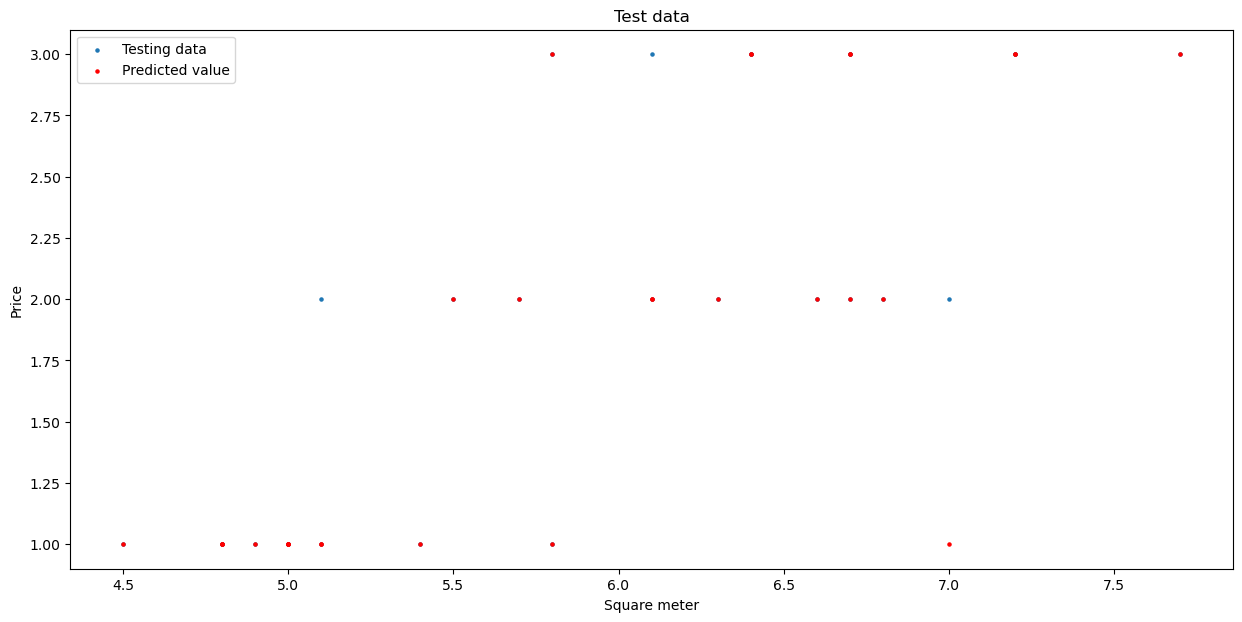

In [501]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))
#print(len(predicted_value[14]))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[0],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

30
57


Text(0.5, 1.0, 'Test data')

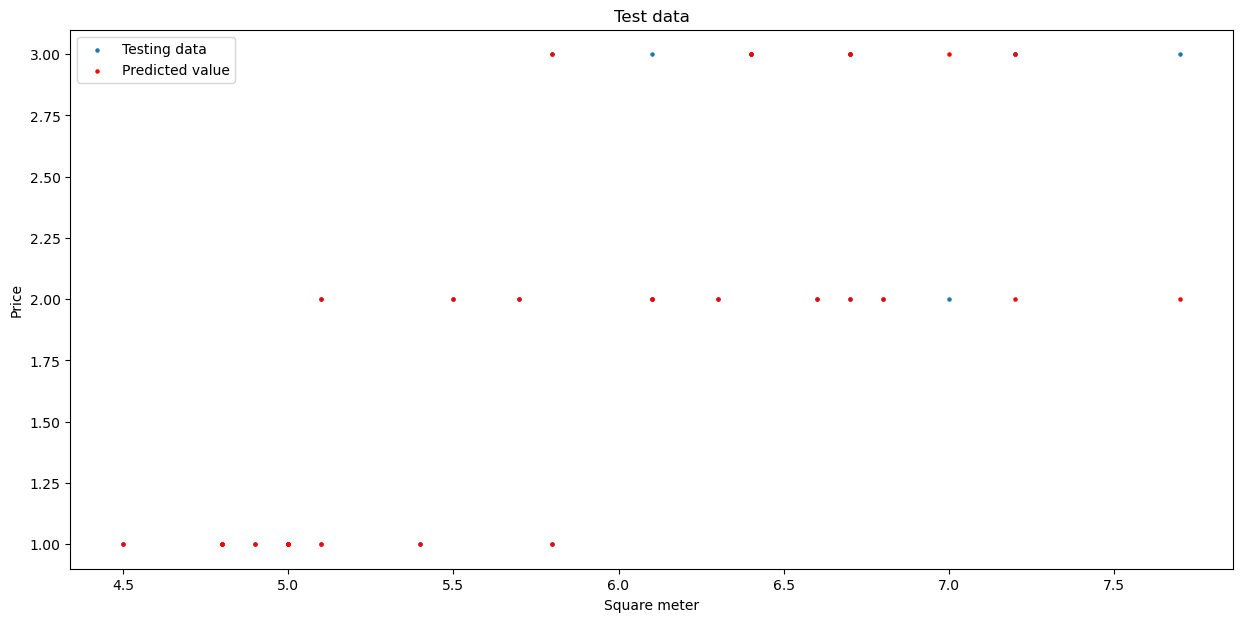

In [502]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))
#print(len(predicted_value[14]))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[1],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

30
57


Text(0.5, 1.0, 'Test data')

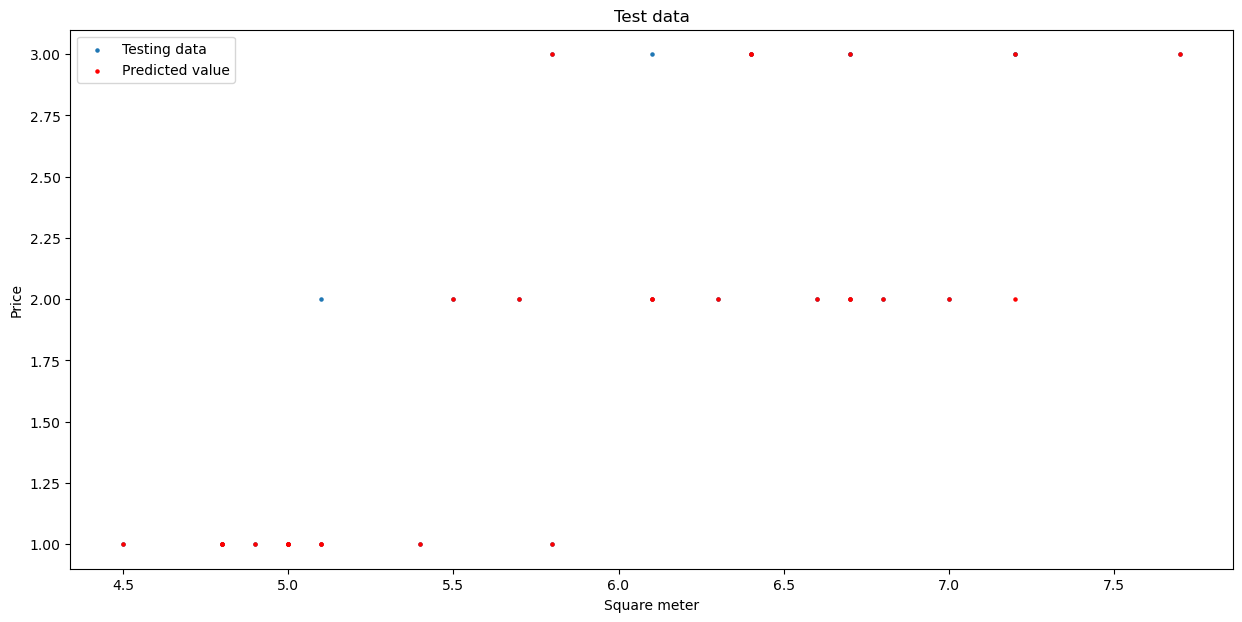

In [503]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))
#print(len(predicted_value[14]))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[2],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

30
57


Text(0.5, 1.0, 'Test data')

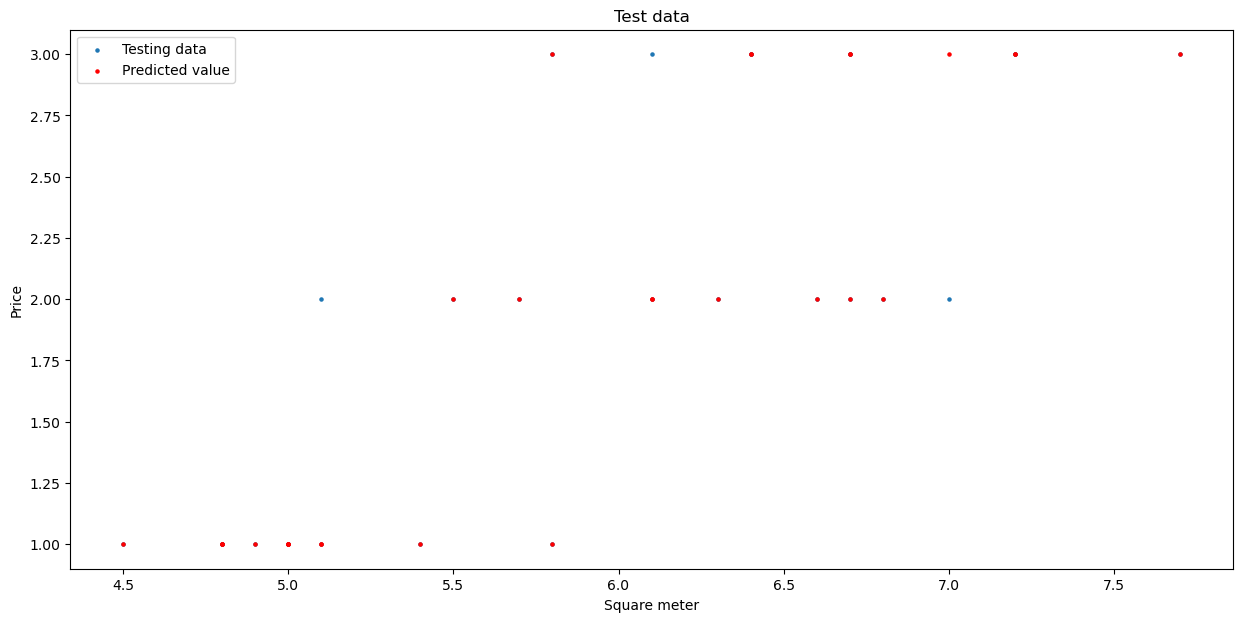

In [504]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))

plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[3],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")